# Homework 7

## Your Name Here (or your names here if you are pair programming)

Student Name: Dylan Lam

Student UT EID: DXL85

---

Partner Name:

Partner UT EID:

---

Date Created: 3/1/19

Date Last Modified:

---

Totoal Points 20. 



## Supprt Vector Machine 

In [586]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [587]:
# Your code here
heart_df = pd.read_csv("/Users/dylanlam/Documents/GitHub/data_science_practice_and_skills/datasets/Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 Implement SVM using libraries (4 points)
We want to use **Suppert Vector Machine** to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement Support Vector Machine using Scikit-Learn. 





In [588]:
# import libraries
from sklearn import svm

In [589]:
# Encoding Target Variable: 1 = no, 0 = yes
heart_df.loc[heart_df['Target'] == 'Yes', 'Target'] = 0
heart_df.loc[heart_df['Target'] == 'No', 'Target'] = 1

In [590]:
# Splitting Features and Target
X = heart_df[['Age', 'Sex', 'Chol']]
y = heart_df['Target'].astype(int)

# Splitting 80% train and 20% testing Manually
X_train = X.sample(frac = .8, random_state = 42).sort_index()
y_train = y[X_train.index]

X_test_index = heart_df.index.difference(X_train.index)

X_test = X.loc[X_test_index]
y_test = y[X_test_index]


# Initialize Support Vector Classification Model
model = svm.SVC()

model.fit(X_train, y_train)

SVC()

# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your **SVM** implementaion from Task 1. 
Print the results. 

You may use library methods for this task if you choose to.


In [591]:
# Importing Library
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy Score: 0.5409836065573771
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.32      0.36        25
           1       0.60      0.69      0.64        36

    accuracy                           0.54        61
   macro avg       0.51      0.51      0.50        61
weighted avg       0.52      0.54      0.53        61



# Task 3 - Implement SVM without using libraries  - (4 points)

Implement SVM from scratch using Hinge Loss function and Gradient Descent. 
Try to produce the same result as you get from the libraries. 


* Do as many iterations as needed 
* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 
* You can use libraries to report accuracy, Precision, Recall and F1. 



In [592]:
# Cost Function
def compute_cost(X, y, W, regularization_factor):
    '''This function calculate the hinge loss. Primal Problem in SVM'''
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
    
    # This is our max(0, distance). 
    distances[distances < 0] = 0 
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    # This divide by 2 is not important. You can skip doing it 
    # because we want only to check if this cost is going down or not. 
    return (1 / 2 * np.dot(W, W) + hinge_loss)


In [593]:
# Gradient Function
def calculate_gradient(X, y, W, regularization_factor):
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])

    distance = 1 - (y * np.dot(X, W))
    dw = np.zeros(len(W))
    for ind, d in enumerate(distance):
        if (d < 0):
            di = W
        else:
            di = W - (regularization_factor * y[ind] * X[ind])                 
        dw += di 
    dw = dw/len(y)  # average
    
    return dw


Epoch 0 Cost is: 0.001
Weights: 
 Age: 0.0 
 Sex: 0.0 
 Chol: 0.0 

Epoch 1 Cost is: 0.0009829238287955486
Weights: 
 Age: 2.779338842975206e-05 
 Sex: 3.099173553719011e-07 
 Chol: 0.0001277190082644628 

Epoch 2 Cost is: 0.0009658817928573346
Weights: 
 Age: 5.555898347107434e-05 
 Sex: 6.195247933884295e-07 
 Chol: 0.0002553102975206611 

Epoch 3 Cost is: 0.0009488738239489613
Weights: 
 Age: 8.329681291735538e-05 
 Sex: 9.288226239669424e-07 
 Chol: 0.0003827739954876031 

Epoch 4 Cost is: 0.0009318998539704357
Weights: 
 Age: 0.00011100690453419008 
 Sex: 1.2378111567148772e-06 
 Chol: 0.0005101102297565784 

Epoch 5 Cost is: 0.0009149598149578973
Weights: 
 Age: 0.00013868928605940793 
 Sex: 1.5464907009300647e-06 
 Chol: 0.0006373191277912844 

Epoch 6 Cost is: 0.000898053639083345
Weights: 
 Age: 0.00016634398520310064 
 Sex: 1.8548615656010364e-06 
 Chol: 0.000764400816927956 

Epoch 7 Cost is: 0.0008811812586543659
Weights: 
 Age: 0.0001939710296476496 
 Sex: 2.16292405940733

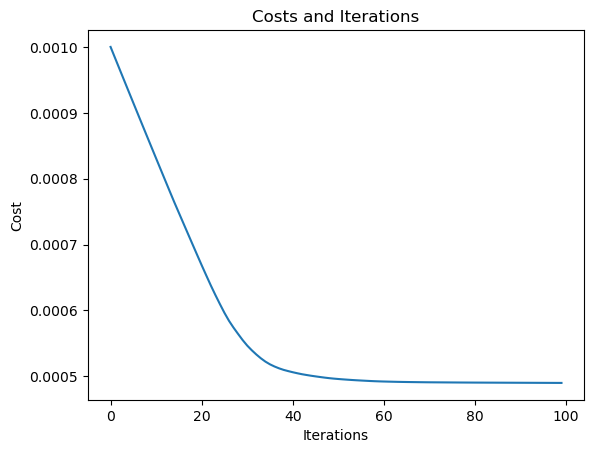

In [594]:
weights = np.zeros(3)


# Now we optimize it using Gradient Descent. 
num_iterations = 100
learning_rate = 0.001

regularization = 0.001

cost_list = []

for i in range(0, num_iterations):
    cost = compute_cost(X_train, y_train, weights, regularization)
    print("Epoch", i, "Cost is:", cost)
    print('Weights:', '\n', 'Age:', weights[0],'\n', 'Sex:', weights[1],'\n', 'Chol:', weights[2], '\n')
    cost_list.append(cost)
    grad = calculate_gradient(X_train.to_numpy(), y_train.to_numpy(), weights, regularization) # Convert to arrays
    weights = weights - learning_rate * grad
    
# Plotting cost
plt.plot(range(num_iterations), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Costs and Iterations')
plt.show()

# Task 4 - Compare SVM results with Logistic Regression - (4 points)

Which model performs better here? Compare your results wit the logistic regression. You can use libraries for this task, it is not necessary to implement logistic regression from sratch.


In [595]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
LR_pred = LRmodel.predict(X_test)
print('Accuracy:', accuracy_score(y_test, LR_pred))
print('Classification Report: \n', classification_report(y_test,LR_pred))

Accuracy: 0.7540983606557377
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.71        25
           1       0.80      0.78      0.79        36

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



The logistic regression model performs better than the support vector classification model by showing better scores for all evaluation metrics.

# Task 5 - Apply a kernel function to improve SVM performance (4 points)

Use the Scikit-learn librariy and apply a kernel function to improve the SVM performance. Check if this is possible. 


In [596]:
poly_model = svm.SVC(kernel='poly')
poly_model.fit(X_train, y_train)
poly_y_pred = poly_model.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, poly_y_pred))
print('Classification Report: \n', classification_report(y_test,poly_y_pred))

Accuracy Score: 0.5573770491803278
Classification Report: 
               precision    recall  f1-score   support

           0       0.45      0.40      0.43        25
           1       0.62      0.67      0.64        36

    accuracy                           0.56        61
   macro avg       0.53      0.53      0.53        61
weighted avg       0.55      0.56      0.55        61



With sklearn's SVC class having rbf as the default kernel, using a poly kernel with the SVM shows a **very small improvement** in all the evaluation metrics.

In [597]:
linear_model = svm.SVC(kernel='linear')
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

print('Accuracy Score:', accuracy_score(y_test, linear_y_pred))
print('Classification Report: \n', classification_report(y_test, linear_y_pred))

Accuracy Score: 0.7868852459016393
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.84      0.76        25
           1       0.87      0.75      0.81        36

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.78        61
weighted avg       0.80      0.79      0.79        61



Using a linear kernel shows a **large** improvement in all the evaluation metrics. Using the linear kernel even shows higher evaluation metrics than the previous logistic regression model for all metrics.